In [1]:
import random
import torch
import scipy.spatial
import numpy as np
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
glove_matrix = np.load("../weights/word2vec_pubmed_embeddings.npy")

word_to_idx = np.load("../corpus/word2vec_vocab_pubmed.npy",
                      allow_pickle=True).item()

idx_to_word = {value: key for key, value in word_to_idx.items()}

In [3]:
def get_idx(word):
    idx = 0
    if word in word_to_idx.keys():
        idx = word_to_idx[word]
    else:
        idx = word_to_idx['<unk>']
    return idx

def get_idxes(words):
    idx = []
    for i in words:
        if i in word_to_idx.keys():
            idx.append(word_to_idx[i])
        else:
            idx.append(word_to_idx['<unk>'])
    return idx

def find_nearest(word, embedding_weights):
    index = get_idx(word)
    embedding = embedding_weights[index]
    cos_dis = np.array([scipy.spatial.distance.cosine(e, embedding) for e in embedding_weights])
    return [idx_to_word[i] for i in cos_dis.argsort()[:10]]

In [4]:
for word in ["one", "green", "computer"]:
    print(word, find_nearest(word, glove_matrix))

one ['one', 'two', 'three', 'four', 'five', 'zero', 'nine', 'six', 'eight', 'seven']
green ['green', 'adsorption', 'hybrid', 'eeg', 'space', 'polymer', 'silver', 'nanoparticles', 'modified', 'sensory']
computer ['computer', 'aided', 'nomogram', 'radiomics', 'scoring', 'endoscopic', 'assisted', 'force', 'system', 'plasmid']


In [5]:
words = ['king', 'man', 'women', 'queen']
idx = get_idxes(words)
vectors = []
for i in idx:
    vectors.append(glove_matrix[i])
input1 = torch.tensor(vectors[0]).resize(1, 50)
input2 = torch.tensor(vectors[1]).resize(1, 50)
input3 = torch.tensor(vectors[2]).resize(1, 50)
cos = nn.CosineSimilarity(dim=1)
print(cos(input1, input2))
print(cos(input1, input3))
print(cos(input3, input2))

tensor([0.5789])
tensor([0.5744])
tensor([0.6356])


d:\python38\lib\site-packages\torch\_tensor.py:493: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [6]:
indexs = ['computer', 'aided', 'sensors', 'robot', 'construction', 'liposomes', 'digital', 'sensing', 'assisted', 'sensor',
         'virus', 'hepatitis', 'viral', 'infection', 'cov', 'sars', 'hbv',  'infections',
         'one', 'two', 'three', 'four', 'five', 'zero', 'six', 'nine', 'eight', 'seven']

random.shuffle(indexs)
ids = get_idxes(indexs)

wordvectors = []
for i in ids:
    wordvectors.append(glove_matrix[i])
wordvectors = np.array(wordvectors)

In [7]:
from sklearn.decomposition import PCA
np.random.seed(10)

pca = PCA(n_components=2)
wordvectors = pca.fit_transform(wordvectors)
wordvectors = pd.DataFrame(wordvectors)

In [9]:
from sklearn.cluster import KMeans
classCount = 3
clf = KMeans(n_clusters=classCount)
clf.fit(wordvectors)
predicts = clf.predict(wordvectors)
for i, j in zip(indexs, clf.labels_):
    print(i, ":", j, end='   ')

eight : 1   one : 1   five : 1   infections : 0   hepatitis : 0   robot : 2   viral : 0   sars : 0   construction : 2   hbv : 2   nine : 1   sensing : 2   four : 1   zero : 1   liposomes : 2   infection : 0   sensor : 2   aided : 2   computer : 2   six : 1   digital : 2   sensors : 2   virus : 0   seven : 1   two : 1   assisted : 2   three : 1   cov : 0   

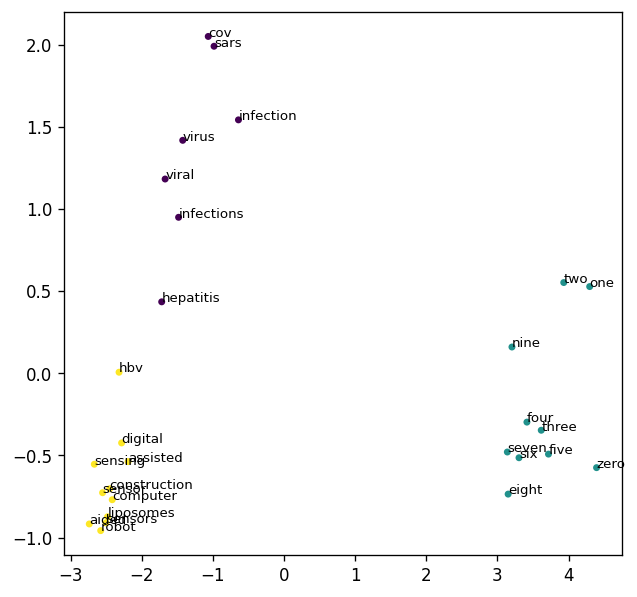

In [11]:
plt.figure(dpi=120, figsize=(6,6))
plt.scatter(x=wordvectors[0],y=wordvectors[1],s=10, c=predicts)

for i, label in enumerate(indexs):
    plt.annotate(label, (wordvectors[0][i],wordvectors[1][i]), fontsize=8)
plt.show()

In [12]:
for word in ["medicine", "surgery", "virus", "diabetic", "myocardial"]:
    print(word, find_nearest(word, glove_matrix))

medicine ['medicine', 'traditional', 'for', 'is', 'management', 'prevention', 'monitoring', 'chinese', 'resource', 'are']
surgery ['surgery', 'following', 'patients', 'surgical', 'after', 'undergoing', 'underwent', 'resection', 'primary', 'revision']
virus ['virus', 'cov', 'hepatitis', 'viral', 'immunodeficiency', 'sars', 'hbv', 'infection', 'influenza', 'caused']
diabetic ['diabetic', 'retinopathy', 'neuropathy', 'nerve', 'cutaneous', 'rats', 'retinal', 'nephropathy', 'head', 'transplant']
myocardial ['myocardial', 'infarction', 'ischemic', 'mi', 'heart', 'coronary', 'reperfusion', 'ischemia', 'elevation', 'acute']
